In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
complaints = pd.read_csv('pandas-cookbook/data/311-service-requests.csv', index_col='Unique Key')

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
complaints.keys()

Index([u'Created Date', u'Closed Date', u'Agency', u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type', u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1', u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2', u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status', u'Due Date', u'Resolution Action Updated Date', u'Community Board', u'Borough', u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)', u'Park Facility Name', u'Park Borough', u'School Name', u'School Number', u'School Region', u'School Code', u'School Phone Number', u'School Address', u'School City', u'School State', u'School Zip', u'School Not Found', u'School or Citywide Complaint', u'Vehicle Type', u'Taxi Company Borough', u'Taxi Pick Up Location', u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp', u'Bridge Highway Segment', u'Garage Lot Name', u'Ferry Direction', u'Ferry Terminal Name', u'Latitude', u'Longitude', u'Location'], dtype='

In [4]:
complaints['Complaint Type']

Unique Key
26589651     Noise - Street/Sidewalk
26593698             Illegal Parking
26594139          Noise - Commercial
26595721             Noise - Vehicle
26590930                      Rodent
26592370          Noise - Commercial
26595682            Blocked Driveway
26595195          Noise - Commercial
26590540          Noise - Commercial
26594392          Noise - Commercial
26595176    Noise - House of Worship
26591982          Noise - Commercial
26594169             Illegal Parking
26594391             Noise - Vehicle
26590917                      Rodent
26591458    Noise - House of Worship
26594086     Noise - Street/Sidewalk
26595117             Illegal Parking
26590389      Street Light Condition
26594210          Noise - Commercial
26592932    Noise - House of Worship
26594152          Noise - Commercial
26589678             Noise - Vehicle
26592304          Noise - Commercial
26591892            Blocked Driveway
26591573     Noise - Street/Sidewalk
26590509      Street Light 

In [5]:
complaints[:5]

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [6]:
complaints[['Complaint Type', "Borough"]][:10]

,Complaint Type,Borough
Unique Key,,
26589651,Noise - Street/Sidewalk,QUEENS
26593698,Illegal Parking,QUEENS
26594139,Noise - Commercial,MANHATTAN
26595721,Noise - Vehicle,MANHATTAN
26590930,Rodent,MANHATTAN
26592370,Noise - Commercial,QUEENS
26595682,Blocked Driveway,QUEENS
26595195,Noise - Commercial,QUEENS
26590540,Noise - Commercial,MANHATTAN


In [7]:
complaint_counts = complaints['Complaint Type'].value_counts()

In [8]:
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

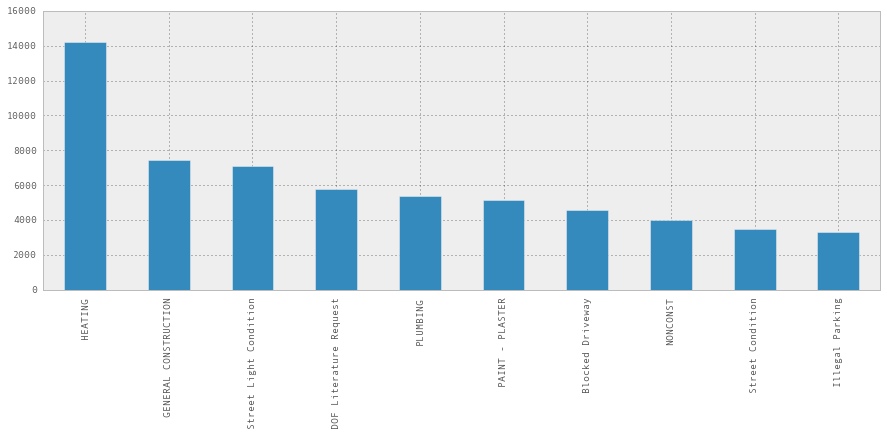

In [11]:
complaint_counts[:10].plot(kind='bar', figsize=(15,5))